# Agrupamento com DBSCAN
#### Aplicando o algoritmo DBSCAN em uma base de dados de crédito.

In [2]:
# importando a biblioteca matplotlib do python
import matplotlib.pyplot as plt
%matplotlib inline

# importando a biblioteca pandas do python
import pandas as pd

# importando a biblioteca sklearn do python
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# importando a biblioteca numpy do python
import numpy as np

In [3]:
# colocando os dados no objeto 'dataframe'
dataframe = pd.read_csv('credit_card_clients.csv', encoding = 'utf-8', sep = ',', header = 1)

In [4]:
# visualizando o objeto 'dataframe'
dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
# visualizando a dimensão do 'dataframe'
print(dataframe.shape)

(30000, 25)


In [6]:
# somando todas as dívidas em uma só coluna para melhor análise dos dados
dataframe['BILL_TOTAL'] = dataframe['BILL_AMT1'] + dataframe['BILL_AMT2'] + dataframe['BILL_AMT3']  
dataframe['BILL_TOTAL'] = dataframe['BILL_AMT4'] + dataframe['BILL_AMT5'] + dataframe['BILL_AMT6']

In [7]:
# visualizando o objeto 'dataframe'
dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,0
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,9988
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,44828
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,86820
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,59217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,135221
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,14169
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,60817
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,113573


In [8]:
# pegando os dados referentes ao limite do cartão e a dívida total
x = dataframe.iloc[:, [1, 25]].values

In [9]:
# visualizando 'x'
print(x)

[[ 20000      0]
 [120000   9988]
 [ 90000  44828]
 ...
 [ 30000  60817]
 [ 80000 113573]
 [ 50000  84276]]


In [10]:
# visualizando a dimensão de x
print(x.shape)

(30000, 2)


In [11]:
# criando o objeto 'scaler'
scaler = StandardScaler()

In [12]:
# escalonando os atributos armazenados em 'x'
x = scaler.fit_transform(x)

In [75]:
# criando o clusterizados 'dbscan'
dbscan = DBSCAN(eps = 0.37, min_samples = 4)

In [76]:
# treinando e obtendo as previsões usando os dados em 'x'
previsoes = dbscan.fit_predict(x)

In [77]:
# obtendo a quantidade de clusters e visualizando quantos dados foram agrupados em cada um deles
clusters, quantidade_clusters = np.unique(previsoes, return_counts = True)

In [78]:
# visualizando os clusters obtidos
print(clusters)

[-1  0  1  2]


In [79]:
# visualizando a quantidade de dados em cada um dos clusters obtidos
print(quantidade_clusters)

[   38 29947    13     2]


Observe que o agrupamento foi diferente de todos os demais algoritmos já testados até então. O DBSCAN não se adaptou muito bem a essa base de dados, fazendo uma previsão mais extrema. Entretanto, dependendo da base de dados utilizadas, o DBSCAN poderá ter uma excelente performace em relação aos demais.

Esse cluster (-1) indica os dados que não foram agrupados em nenhum dos grupos, provavelmente por estarem distantes demais dos outros dados (não conseguindo aparecer no raio de nenhum dos dados).

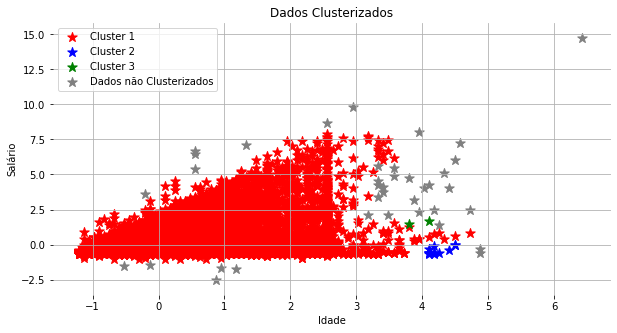

In [80]:
# configurando o gráfico
plt.figure(figsize = (10,5))
plt.title('Dados Clusterizados')
plt.scatter(x[previsoes == 0, 0], x[previsoes == 0, 1], s = 100, marker = '*', c = 'red', 
            label = 'Cluster 1')
plt.scatter(x[previsoes == 1, 0], x[previsoes == 1, 1], s = 100, marker = '*', c = 'blue', 
            label = 'Cluster 2')
plt.scatter(x[previsoes == 2, 0], x[previsoes == 2, 1], s = 100, marker = '*', c = 'green', 
            label = 'Cluster 3')
plt.scatter(x[previsoes == -1, 0], x[previsoes == -1, 1], s = 100, marker = '*', c = 'gray', 
            label = 'Dados não Clusterizados')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.grid(True)
plt.box(False)
plt.legend()

### Alguma Dúvida? Entre em Contato Comigo:

- [Me envie um e-mail](mailto:alysson.barbosa@ee.ufcg.edu.br);